The purpose of this notebook is exam the income of people who already purchased ev vehicles to see if there is a coorelation. This data set exams the trend in Europe due to better records in where the evs are sold. Since, the data set does not include the actual income of the people buying the ev cars, it is possible that the true consumers are the wealthier portion of the population. For this analysis, we assume that the total sales regardless of year assuming a fixed average income and population in each country based on the 2022 year.

In [1]:
# import dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting path to data set
path = '../../../data/'

In [4]:
# data set from https://www.statista.com/outlook/mmo/electric-vehicles/worldwide
# yearly sales are given in units per thousand vehicles
sales_df=pd.read_csv(path+"EUsales.csv")
#display 1st 5 lines in data frame
sales_df.head()

,Country,2016,2017,2018,2019,2020,2021,2022,type
0,Australia,0.57,1.40,1.78,6.20,5.16,16.94,32.96,BATTERY ELECTRIC VEHICLES
1,Australia,0.84,0.99,2.17,2.83,1.29,4.20,7.15,PLUG-IN HYBRID ELECTRIC VEHICLES
2,Austria,3.81,5.40,6.77,9.24,15.96,33.38,33.77,BATTERY ELECTRIC VEHICLES
3,Austria,1.18,1.82,2.13,2.77,7.76,14.63,13.27,PLUG-IN HYBRID ELECTRIC VEHICLES
4,Belgium,2.22,2.95,4.04,8.89,15.00,21.98,37.82,BATTERY ELECTRIC VEHICLES


In [5]:
# display info about sales dataframe
sales_df.info()
# filling null to 0 sales
sales_df = sales_df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  60 non-null     object 
 1   2016     55 non-null     float64
 2   2017     60 non-null     float64
 3   2018     60 non-null     float64
 4   2019     60 non-null     float64
 5   2020     60 non-null     float64
 6   2021     60 non-null     float64
 7   2022     60 non-null     float64
 8   type     60 non-null     object 
dtypes: float64(7), object(2)
memory usage: 4.3+ KB


In [6]:
# data set from https://www.statista.com/outlook/mmo/electric-vehicles/worldwide
#import data frame for country population
population_df_org = pd.read_csv(path+"population.csv")
#display 1st 5 lines in data frame
population_df_org.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Australia,19.0,19.3,19.5,19.7,19.9,20.2,20.5,20.8,21.3,...,8.1,8.2,8.3,8.4,8.5,8.5,8.6,8.6,8.7,8.7
1,Austria,8.0,8.0,8.1,8.1,8.2,8.2,8.3,8.3,8.3,...,23.1,23.5,23.8,24.2,24.6,25.0,25.4,25.7,25.9,26.2
2,Belgium,10.3,10.3,10.4,10.4,10.5,10.5,10.6,10.7,10.7,...,11.1,11.2,11.3,11.3,11.4,11.5,11.5,11.6,11.6,11.7
3,Bulgaria,8.1,8.0,8.0,7.9,7.9,7.8,7.8,7.7,7.7,...,7.4,7.4,7.3,7.2,7.2,7.1,7.1,7.0,6.9,6.8
4,Croatia,4.5,4.5,4.5,4.5,4.4,4.4,4.4,4.4,4.4,...,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5,10.5


In [7]:
# dataframe consisting a subset of the population for years 2016-2022
population_df = population_df_org[['Country',"2016","2017","2018","2019","2020","2021","2022"]].copy()

In [8]:
# merging sales and population dataframe
sales_country_df = sales_df.merge(population_df, how='inner', on='Country')
# displaying 1st 5 rows of dataframe
sales_country_df.head()

,Country,2016_x,2017_x,2018_x,2019_x,2020_x,2021_x,2022_x,type,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y
0,Australia,0.57,1.40,1.78,6.20,5.16,16.94,32.96,BATTERY ELECTRIC VEHICLES,8.4,8.5,8.5,8.6,8.6,8.7,8.7
1,Australia,0.84,0.99,2.17,2.83,1.29,4.20,7.15,PLUG-IN HYBRID ELECTRIC VEHICLES,8.4,8.5,8.5,8.6,8.6,8.7,8.7
2,Austria,3.81,5.40,6.77,9.24,15.96,33.38,33.77,BATTERY ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2
3,Austria,1.18,1.82,2.13,2.77,7.76,14.63,13.27,PLUG-IN HYBRID ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2
4,Belgium,2.22,2.95,4.04,8.89,15.00,21.98,37.82,BATTERY ELECTRIC VEHICLES,11.3,11.4,11.5,11.5,11.6,11.6,11.7


In [9]:
# renaming columns _x: from sales df _y: from population df
sales_country_df.columns = sales_country_df.columns.str.replace("_x", " (sales)", regex=True)
sales_country_df.columns = sales_country_df.columns.str.replace("_y", " (population)", regex=True)
# displaying 1st 5 rows of dataframe
sales_country_df.head()


,Country,2016 (sales),2017 (sales),2018 (sales),2019 (sales),2020 (sales),2021 (sales),2022 (sales),type,2016 (population),2017 (population),2018 (population),2019 (population),2020 (population),2021 (population),2022 (population)
0,Australia,0.57,1.40,1.78,6.20,5.16,16.94,32.96,BATTERY ELECTRIC VEHICLES,8.4,8.5,8.5,8.6,8.6,8.7,8.7
1,Australia,0.84,0.99,2.17,2.83,1.29,4.20,7.15,PLUG-IN HYBRID ELECTRIC VEHICLES,8.4,8.5,8.5,8.6,8.6,8.7,8.7
2,Austria,3.81,5.40,6.77,9.24,15.96,33.38,33.77,BATTERY ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2
3,Austria,1.18,1.82,2.13,2.77,7.76,14.63,13.27,PLUG-IN HYBRID ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2
4,Belgium,2.22,2.95,4.04,8.89,15.00,21.98,37.82,BATTERY ELECTRIC VEHICLES,11.3,11.4,11.5,11.5,11.6,11.6,11.7


In [10]:
#import data frame for average income in US dollars from 2022 in some EU countries
#data from https://www.statista.com/statistics/557777/average-annual-salaries-in-europe/
country_df = pd.read_csv(path+"income.csv")
#display 1st 5 lines in data frame
country_df.head()

,Abbreviation,Country,wage
0,AT,Austria,63801.62
1,BE,Belgium,64847.62
2,BG,Bulgaria,10697.79
3,CH,Switzerland,72993.02
4,CZ,Czechia,33475.52


In [11]:
# reanming country so they are the same in all dataframes
country_df['Country'].loc[country_df['Country']=='Slovak Republic'] = 'Slovakia'

In [12]:
# merging sales and population with income dataframe
sales_country_df = sales_country_df.merge(country_df, how='inner', on='Country')
#display 1st 5 lines in data frame
sales_country_df.head()

,Country,2016 (sales),2017 (sales),2018 (sales),2019 (sales),2020 (sales),2021 (sales),2022 (sales),type,2016 (population),2017 (population),2018 (population),2019 (population),2020 (population),2021 (population),2022 (population),Abbreviation,wage
0,Austria,3.81,5.40,6.77,9.24,15.96,33.38,33.77,BATTERY ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2,AT,63801.62
1,Austria,1.18,1.82,2.13,2.77,7.76,14.63,13.27,PLUG-IN HYBRID ELECTRIC VEHICLES,24.2,24.6,25.0,25.4,25.7,25.9,26.2,AT,63801.62
2,Belgium,2.22,2.95,4.04,8.89,15.00,21.98,37.82,BATTERY ELECTRIC VEHICLES,11.3,11.4,11.5,11.5,11.6,11.6,11.7,BE,64847.62
3,Belgium,7.12,11.65,9.44,8.83,33.01,48.45,60.54,PLUG-IN HYBRID ELECTRIC VEHICLES,11.3,11.4,11.5,11.5,11.6,11.6,11.7,BE,64847.62
4,Bulgaria,0.01,0.01,0.14,0.19,0.28,0.55,1.02,BATTERY ELECTRIC VEHICLES,7.2,7.2,7.1,7.1,7.0,6.9,6.8,BG,10697.79


In [13]:
# creating a subset of the original dataframe
subset_df = sales_country_df[['Country','Abbreviation','2022 (sales)','2022 (population)','wage']].copy()
# summing the number of ev's sold for each country
subset_df = subset_df.groupby(['Country','Abbreviation','2022 (population)','wage']).sum()
#reseting index
subset_df = subset_df.reset_index()

In [14]:
# scaling # of ev sales by population to offset dependence on the number of people
subset_df['sales/0.1M people'] = subset_df['2022 (sales)']*100/subset_df['2022 (population)']
# converting sales from number sold per 1000 to number sold
subset_df['sales'] =  (subset_df['2022 (sales)']*1000).astype(int)

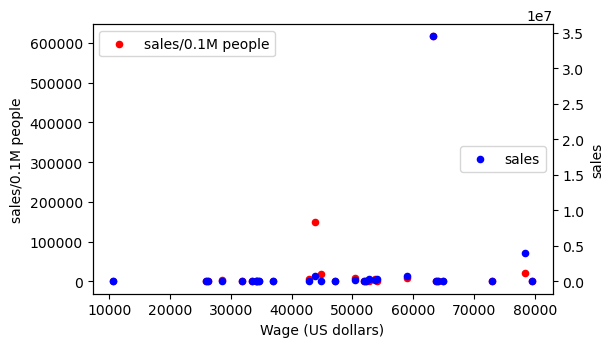

In [15]:
# creating size of subplot
fig, ax = plt.subplots(figsize=(8,3.5))
# creating 2nd axis
ax3 = ax.twinx()
# creating axis on the right sid of figure
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
# creating scatter plot of sales/0.1M people vs wage
ax = subset_df.plot.scatter(x="wage", y='sales/0.1M people', ax=ax,
                                   color='red',label='sales/0.1M people')
# adding 2nd scatter plot of sales vs wage
subset_df.plot.scatter(x="wage", y='sales', ax=ax3, color='blue',label='sales',
                             secondary_y=True)
#labeling x axis
ax.set_xlabel("Wage (US dollars)")
# position label so not on top of data points
plt.legend(loc='right')

In [16]:
# print dataframe and sort by sales/ 10,000 people
subset_df[['Country','Abbreviation','wage','2022 (population)','sales/0.1M people',
                  'sales']].sort_values(by='sales/0.1M people')

,Country,Abbreviation,wage,2022 (population),sales/0.1M people,sales
22,Slovakia,SK,26262.84,67.5,4.666667,3150
5,Estonia,EE,34704.57,5.5,20.545455,1130
2,Bulgaria,BG,10697.79,6.8,21.764706,1480
23,Slovenia,SI,47203.63,8.9,33.146067,2949
14,Latvia,LV,34136.15,2.8,37.857143,1060
12,Ireland,IE,52242.62,59.0,39.796610,23480
20,Poland,PL,36896.56,47.6,46.239496,22009
6,Finland,FI,51835.87,64.6,47.523220,30700
9,Greece,EL,25978.98,10.0,83.200000,8320
0,Austria,AT,63801.62,26.2,179.541985,47040


There appears to be no strong cooralation between the number of ev cars purchased vs income in Europe. Each wage point represents a different country. The largest number of sales is the Netherlands (see blue points, scale on the right axis). Looking at the raw sales is a little deceptive as the population in some countries are larger than other so there is a larger chance to sell more. The sales were normalized to the country populationg to see if there is a trend for income vs number of car sales (red points, scale on the left axis). It appears, that the ev sales are more country specific can income driven. The number of ev sales also doesn't correlate with the ecofriendly countries (see list below).


from https://www.statista.com/statistics/827292/countries-with-the-highest-environmental-performance-index/
    Countries with the highest Environmental Performance Index (EPI) value 2022	
Ranking of countries with the highest Environmental Performance Index (EPI) value in 2022	
Denmark	77.90
United Kingdom	77.70
Finland	76.50
Malta	75.20
Sweden	72.70
Luxembourg	72.30
Slovenia	67.30
Austria	66.50
Switzerland	65.90
Iceland	62.80
Netherlands	62.60
France	62.50
Germany	62.40
Estonia	61.40
Latvia	61.10
